# Background & Motivation

For this lab, we will explore logistic regression in a multi-class classification problem. Given black and white handwritten digits, let us try to achieve the highest classification as possible. 

We will also visualize accuracy metrics and experiment with regularization to see its effect on testing accuracy.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression as LR

# Obtain & Visualize Data

Adapted from the full MNIST dataset, scikit-learn has a built-in smaller digits dataset that can be imported.

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
# RUN THIS CELL, OBSERVE
# This is our training data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
# RUN THIS CELL, OBSERVE
# This is the flatten data that make up the very first image
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# RUN THIS CELL, OBSERVE
# This is a flat array that holds the labels (the "answers") for each image in the dataset
# In this case, the first image is actually a "0", the last image is actually a "8"
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
# RUN THIS CELL, OBSERVE
# All the classes for this dataset are here (numbers 0 to 9)
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# RUN THIS CELL, OBSERVE
# This is the shaped array that make up the image of the first datapoint
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

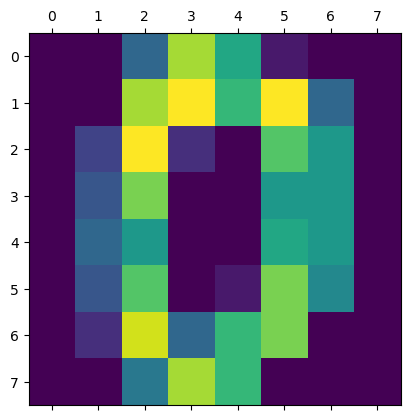

In [12]:
# RUN THIS CELL, OBSERVE
# From the previous cell, the shaped array can be passed into matshow to display the first datapoint
# As expected, it is a 0
plt.matshow(digits.images[0])

Write a function that will display the first n images (n is any positive integer) in the dataset. Be sure to include a title that states the label for each image. To test your function, display the first 5 images of the dataset.

Hint 1: Use a for loop

Hint 2: Check out plt.title


In [51]:
def firstn(n):
    for i in range(0,n):
        plt.matshow(digits.images[i])
        title='target={0:d}'.format(digits.target[i])
        plt.title(title)

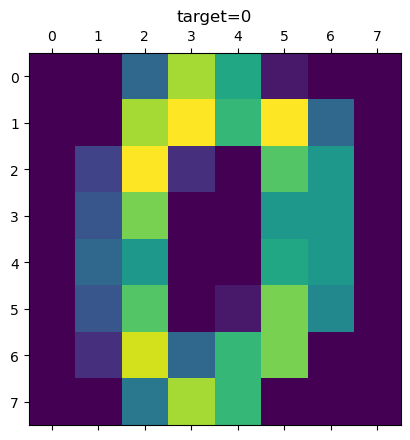

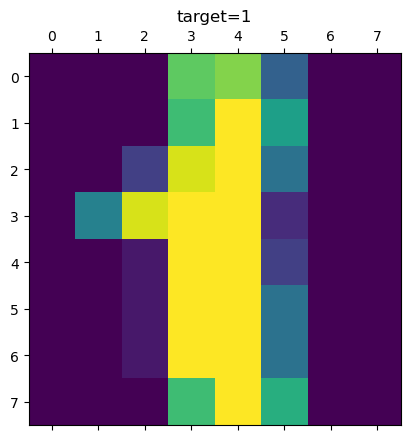

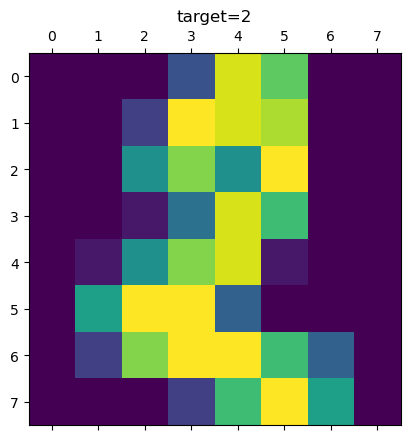

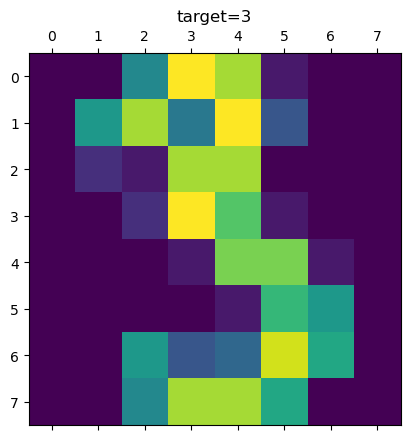

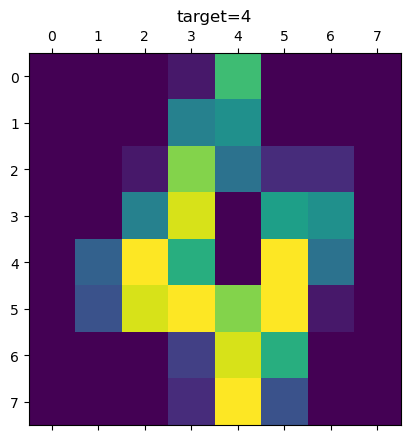

In [52]:
firstn(n=5)

# Constructing Training & Testing Dataset

Create a training and testing dataset from the data obtained. 

In [88]:
X = digits.data
Y = digits.target

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 3)

# Create & Train Learning Model

Create a logistic regression model. Feel free to experiment with different levels of regularization (different C parameters). 

Recall from lecture that C helps with "overfitting" problems when the model encounters unseen data (testing data).

What can you observe using different levels of regularization? Any patterns? Try C = 1e-3, 0.01, 0.1, 1, 10, 100, 1e3, 1e5, 1e10.

Hint: Use a for loop for convenience

In [87]:
C = [1e-3, 0.01, 0.1, 1, 10 , 100, 1e3, 1e5, 1e10]

In [94]:
for c in C:
    lr = LR(C=c)
    model = lr.fit(X_train, y_train)
    print(c,model.score(X_test,y_test))

0.001 0.9555555555555556
0.01 0.9622222222222222
0.1 0.9577777777777777
1 0.9511111111111111
10 0.9533333333333334
100 0.9511111111111111
1000.0 0.9533333333333334
100000.0 0.9444444444444444
10000000000.0 0.9266666666666666


Using different levels of regularization, the accuracy of the logistic regression model varies. Trying different c values provided me with different accuracy scores. There is no explicit pattern, but the accuracy score increases as the c value increases, peaking at 0.01. 

Recall in previous lectures/labs we have discussed about scaling and how scaling certain features (especially if there is a large range) could improve accuracy of models.



In [95]:
# RUN THIS CELL, OBSERVE
# Note that the range of the data is from 0 to 16
X_train[0]

array([ 0.,  0.,  6., 12., 14.,  4.,  0.,  0.,  0.,  2., 15.,  2.,  1.,
       15.,  0.,  0.,  0.,  2., 14.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
       13.,  5., 14., 14.,  6.,  0.,  0.,  0.,  2.,  8.,  4.,  7.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  5.,  0.,
        5., 14.,  3.,  0.,  0.,  0.,  7., 13., 12.,  4.,  0.,  0.])

In [96]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [97]:
mms = MMS()

In [98]:
# RUN THIS CELL, OBSERVE
# After scaling with a minmax ratio, the range of the data is now from 0 to 1
mms.fit_transform(X_train)

array([[0.    , 0.    , 0.375 , ..., 0.25  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.5   , 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.9375, 0.375 , 0.    ],
       ...,
       [0.    , 0.    , 0.5   , ..., 0.25  , 0.    , 0.    ],
       [0.    , 0.25  , 0.8125, ..., 0.75  , 0.75  , 0.0625],
       [0.    , 0.    , 0.375 , ..., 0.5   , 0.    , 0.    ]])

Using the built-in minmax scaler, scale the training data and the testing data. Be sure to save the transformed version to a new variable (for example X_train_scaled and X_test_scaled).

Then, train and test the model with the scaled versions of the data. Does the accuracy improve? (It should)

In [102]:
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)
lr_scaled = LR()
modelscaled = lr_scaled.fit(X_train_scaled, y_train)
modelscaled.score(X_test_scaled,y_test)

0.9622222222222222

In [ ]:
#The accuracy did improve. 

Using the scaled versions of the data, train and test models with varying C parameters. Print out the accuracy for each model. Use a for loop.

In [103]:
for c in C:
    lr = LR(C=c)
    model = lr.fit(X_train_scaled, y_train)
    print(c,model.score(X_test_scaled,y_test))

0.001 0.7822222222222223
0.01 0.9155555555555556
0.1 0.9466666666666667
1 0.9622222222222222
10 0.9533333333333334
100 0.9555555555555556
1000.0 0.9511111111111111
100000.0 0.9511111111111111
10000000000.0 0.9222222222222223


# Accuracy Metrics

Display your model findings using a confusion matrix. At a glance, what can you conclude? State your observations. For example, are there certain classes that are easy to misclassify? What do you think contributes how samples are classified as?

<AxesSubplot: >

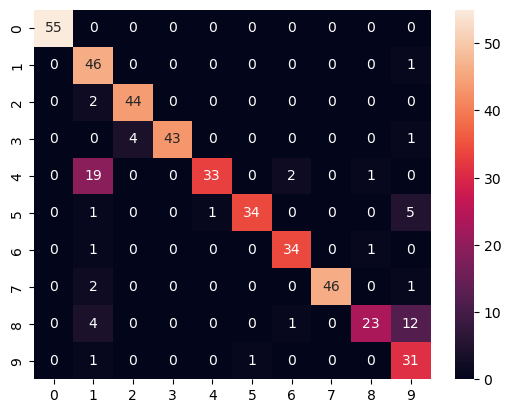

In [104]:
y_prediction =model.predict(X_test)
cm = confusion_matrix(y_test,y_prediction)
sns.heatmap(cm,annot=True,fmt='g')

At a glance, there seems to be few numbers of false positives and false negatives. For the most part, the classification model had true negatives or true positives. However there are high numbers of false positives between the classes of 1 and 4 and high numbers of false negatives between 8 and 9. Thus,these classes seem to be the most likely to be misclassified.  I think that the handwriting used, the similarities between different numbers, the complexity of the classification model, and the amount of data used all contribute to how the samples are classified. 